# Analisi sul data set Amazon E-commerce Products & Reviews
Il <a href="https://www.kaggle.com/datasets/lazylad99/amazon-e-commerce-product-and-review-dataset">dataset **Amazon E-commerce Products & Reviews**</a> su Kaggle, contiene metadati dettagliati dei prodotti Amazon, recensioni dei clienti e punteggi di sentiment. Questo insieme di dati è particolarmente indicato per analizzare il mercato e i comportamenti d'acquisto.

SCOPO FINALE DELL'ANALISI DATI
- Brand più recensiti e con sentimento positivo (per cui brand dove conviene investire)
- Brand più recensiti e con sentimento negativo (per cui brand dove NON conviene investire)

- Categorie prodotti più venduti e totale degli incassi in base alla categoria
- Categorie prodotti più recensiti e con sentimento positivo (per cui categorie su cui investire)
- Categorie prodotti più recensiti e con sentimento negativo (per cui categorie su cui NON investire)
- Prodotti più recensiti e con sentimento positivi
- Prodotti più recensiti e con sentimento negativo

In [143]:
#import library
#data analisys
import pandas as pd 
import numpy as np 
import math
#data visualitation
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter, AutoDateLocator
print(pd.__version__, np.__version__, sns.__version__)


2.2.3 2.1.3 0.13.2


## Comprensione dei Dati (EDA)

In [50]:
#import dataset or dataframe
dfamazon = pd.read_csv('products_with_reviews_clean.csv', low_memory=False)

#leggo le prime 4 righe del dataframe e le visualizzo nello schermo
display(dfamazon.head(4))

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score
0,146,SLIM FIT. Designed with a functional fit in mi...,B0006U6C0Q,In Stock,"#1,493 in Clothing, Shoes & Jewelry (See Top 1...",Wrangler Store,"Clothing, Shoes & Jewelry › Men › Clothing › J...",Customers appreciate the jeans for their quali...,size:34W x 29L,color:Prewashed Indigo,...,R103VSGVPRSZ6F,230.0,Color: Prewashed IndigoSize: 32W x 34L,5.0,"Reviewed in the United States on September 18,...",2.0,For the 936PWD Style!,True,husband wrangler man probably last year used h...,0.1340
1,54,DESIGNS: Right sleeve with a pocket of the pol...,B09TK9248H,In Stock,"#49,564 in Clothing, Shoes & Jewelry (See Top ...",ZITY Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers appreciate the nice colors and comfo...,size:X-Large,color:Gnblg,...,R103YA89AQKKT4,0.0,Size: X-LargeColor: GnblkHeight: 6'3Weight: 21...,5.0,"Reviewed in the United States on December 16, ...",4.0,You should buy these,True,low expectation cheap going give son turn husb...,0.3563
2,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,In Stock,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers find that the compression shirts fit...,size:Medium,NaN,...,R105XJ6QWC0GUL,0.0,Size: SmallColor: White (100)/Black,5.0,"Reviewed in the United States on January 18, 2025",8.0,Keep a you cool while working out,True,got wear hockey equipment keep cool dry run li...,0.1292
3,56,"100% Polyester, Quick Dry & Lightweight，Camo p...",B0C1SC8PR9,In Stock,"#44,945 in Clothing, Shoes & Jewelry (See Top ...",MoFiz Store,"Clothing, Shoes & Jewelry › Men › Clothing › S...","Customers appreciate the comfortable fit, nice...",size:Large,color:B-army Green Camo,...,R1084B47TWDC0Z,0.0,Size: X-LargeColor: B-army Green CamoHeight: 5...,5.0,"Reviewed in the United States on December 26, ...",4.0,Very comfortable and breathable,True,liked true size good price lightweight comfort...,0.5100


### Shape e Struttura base
<i>Obiettivo: capire volume e tipi dati. Molti object da pulire (prezzi, rating).</i>

Il dataframe in analisi ha 6355 righe e 35 colonne.

Le colonne del dataframe nel dettaglio:
- **s_no**: è un numero intero che contiene gli id di prodotti
- **about_item**: è un oggetto e contiene la descrizione breve del prodotto

In [51]:
#mostrare il numero di righe e il numero di colonne
display('Numero di righe e colonne', dfamazon.shape)
#mostro tutti nomi delle colonne del dataframe
display('Nome delle colonne',dfamazon.columns)
#mostro le distribuzione del tipo valore
display(dfamazon.dtypes.value_counts())

'Numero di righe e colonne'

(6355, 35)

'Nome delle colonne'

Index(['s_no', 'about_item', 'asin', 'availability', 'best_sellers_rank',
       'brand_name', 'breadcrumbs', 'customer_review_summary',
       'default_variant0', 'default_variant1', 'default_variant2',
       'manufacturer', 'model_number', 'price_value', 'product_description',
       'rating_count', 'rating_distribution1star', 'rating_distribution2star',
       'rating_distribution3star', 'rating_distribution4star',
       'rating_distribution5star', 'rating_stars', 'recent_purchases',
       'seller_name', 'title', 'review_id', 'helpful_vote_count',
       'product_variant', 'rating', 'review_metadata', 'review_position',
       'review_title', 'verified_purchase', 'cleaned_review_text',
       'sentiment_score'],
      dtype='object')

object     29
float64     5
int64       1
Name: count, dtype: int64

### Statistiche Descrittive
<i>Obiettivo: capire le colonne e gli attributi presenti nel DataFrame.</i>

Dall'analisi descrittiva posso dedurre che abbiamo 3 parametri a cui mancano la stessa quantità di dati pari a 28, nello specifico: helpful_vote_count, review_position e sentiment_score. Invece nella colonna rating la mancanza dei dati è leggermente più elevata, ovvero 35 valori mancanti.

L'analisi del prodotto in generale mostra che questo ha un prezzo medio di 33,70.

Infine le recensioni dei prodotti sono più che positive perchè il loro rating medio con range compreso tra 1-5 è 4.533228.

In [52]:
#mostrare i nomi delle colonne e i tipi di dati all'interno e se questi dati hanno dei dati mancati
display(dfamazon.info())
#genera un riepilogo statistico automatico delle colonne numeriche - Restituisce una tabella con metriche chiave: count (numero valori non-null), mean (media), std (deviazione standard), min (minimo), 25% (1° quartile), 50% (mediana), 75% (3° quartile), max (massimo), evidenziando distribuzioni, outlier e tendenze
display(dfamazon.describe())
#genera statistiche descrittive per tutte le colonne del DataFrame, inclusi tipi numerici, categorici (object/string), booleani e datetime, anziché solo numeriche. Per colonne numeriche mostra count, mean, std, min, quartili (25%, 50%/mediana, 75%), max; per categoriche aggiunge unique (valori unici), top (valore più frequente), freq (frequenza top). Esclude NaN automaticamente.
display(dfamazon.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   s_no                      6355 non-null   int64  
 1   about_item                6355 non-null   object 
 2   asin                      6355 non-null   object 
 3   availability              6254 non-null   object 
 4   best_sellers_rank         5001 non-null   object 
 5   brand_name                6355 non-null   object 
 6   breadcrumbs               6288 non-null   object 
 7   customer_review_summary   5829 non-null   object 
 8   default_variant0          6187 non-null   object 
 9   default_variant1          5886 non-null   object 
 10  default_variant2          10 non-null     object 
 11  manufacturer              2369 non-null   object 
 12  model_number              1769 non-null   object 
 13  price_value               6355 non-null   float64
 14  product_

None

,s_no,price_value,helpful_vote_count,rating,review_position,sentiment_score
count,6355.000000,6355.000000,6327.000000,6320.000000,6327.000000,6327.000000
mean,411.259481,33.705065,3.336336,4.533228,5.374743,0.307546
std,290.009883,23.617557,19.090762,0.855710,2.889921,0.218020
min,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000
25%,175.000000,19.900000,0.000000,4.000000,3.000000,0.168600
50%,357.000000,28.410000,0.000000,5.000000,5.000000,0.300000
75%,542.500000,40.010000,2.000000,5.000000,8.000000,0.450000
max,1011.000000,249.990000,710.000000,5.000000,10.000000,1.000000


,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score
count,6355.000000,6355,6355,6254,5001,6355,6288,5829,6187,5886,...,6327,6327.000000,5836,6320.000000,6296,6327.000000,6313,6327,6288,6327.000000
unique,NaN,697,728,11,539,285,140,616,118,413,...,6327,NaN,4923,NaN,774,NaN,5162,2,6182,NaN
top,NaN,COMFORT FLEX WAISTBAND: Constructed with comfo...,B074KL8RVS,In Stock,"#470 in Clothing, Shoes & Jewelry (See Top 100...",Hanes Store,"Clothing, Shoes & Jewelry › Men › Clothing › J...",Customers appreciate the pants for their good ...,size:Large,color:Black,...,R103VSGVPRSZ6F,NaN,Size: MediumColor: Black,NaN,"Reviewed in the United States on March 6, 2025",NaN,Comfortable,True,good,NaN
freq,NaN,33,19,5739,33,319,511,14,1528,969,...,1,NaN,31,NaN,154,NaN,64,6167,13,NaN
mean,411.259481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.336336,NaN,4.533228,NaN,5.374743,NaN,NaN,NaN,0.307546
std,290.009883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.090762,NaN,0.855710,NaN,2.889921,NaN,NaN,NaN,0.218020
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,-1.000000
25%,175.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,4.000000,NaN,3.000000,NaN,NaN,NaN,0.168600
50%,357.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,5.000000,NaN,5.000000,NaN,NaN,NaN,0.300000
75%,542.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,NaN,5.000000,NaN,8.000000,NaN,NaN,NaN,0.450000


### Valori mancanti (Missing Values) e Duplicati

#### Dati Mancanti isnull()

In [53]:
#creo una variabile che contiene tutti i dati per colonna null
valuesmissing = dfamazon.isnull().sum()
#controllo tutti i dati null per colonna e seleziono solo quelli che hanno un valore superiore a 0 e li ordino in modo decrescente
valuesmissing[valuesmissing>0].sort_values(ascending=False)

default_variant2           6345
model_number               4586
product_description        4000
manufacturer               3986
best_sellers_rank          1354
recent_purchases           1098
customer_review_summary     526
product_variant             519
default_variant1            469
default_variant0            168
seller_name                 107
availability                101
breadcrumbs                  67
cleaned_review_text          67
review_metadata              59
review_title                 42
rating                       35
review_id                    28
helpful_vote_count           28
review_position              28
verified_purchase            28
sentiment_score              28
rating_stars                  9
rating_count                  9
dtype: int64

In [54]:
#controllo tutti i dati null per colonna e seleziono solo quelli che hanno un valore superiore a 0 e li ordino in modo decrescente
#dividendola per la lunghezza delle righe del dataframe e moltiplicandola per 100 
(valuesmissing[valuesmissing>0].sort_values(ascending=False) / len(dfamazon) * 100).round(3)
#round -> funzione che arrotonda all'intero più vicino

default_variant2           99.843
model_number               72.164
product_description        62.943
manufacturer               62.722
best_sellers_rank          21.306
recent_purchases           17.278
customer_review_summary     8.277
product_variant             8.167
default_variant1            7.380
default_variant0            2.644
seller_name                 1.684
availability                1.589
breadcrumbs                 1.054
cleaned_review_text         1.054
review_metadata             0.928
review_title                0.661
rating                      0.551
review_id                   0.441
helpful_vote_count          0.441
review_position             0.441
verified_purchase           0.441
sentiment_score             0.441
rating_stars                0.142
rating_count                0.142
dtype: float64

In [55]:
#CREO DATAFRAME pd.DataFrame
dfamazon_missing = pd.DataFrame(
    #creazione delle colonne NomeColonna : ValoridaAssegnare
    {
        'Colonna': dfamazon.columns,
        'N_Dati_Mancanti':(dfamazon.isnull().sum()).round(2),
        '%_Dati_Mancanti': (dfamazon.isnull().sum()/len(dfamazon)*100).round(2),
    }
    #query per pulire il nuovo DataFrame e ordinare (sort_values) i valori
).query('N_Dati_Mancanti>0').sort_values('N_Dati_Mancanti',ascending=False)

display(dfamazon_missing)

,Colonna,N_Dati_Mancanti,%_Dati_Mancanti
default_variant2,default_variant2,6345,99.84
model_number,model_number,4586,72.16
product_description,product_description,4000,62.94
manufacturer,manufacturer,3986,62.72
best_sellers_rank,best_sellers_rank,1354,21.31
recent_purchases,recent_purchases,1098,17.28
customer_review_summary,customer_review_summary,526,8.28
product_variant,product_variant,519,8.17
default_variant1,default_variant1,469,7.38
default_variant0,default_variant0,168,2.64


#### Dati Duplicati (duplicated())

In [56]:
#Valori duplicati per tutto il dataFrame
dfamazon.duplicated().sum()
#Valori duplicati per le colonne asin e review_id del DataFrame
dfamazon[dfamazon.duplicated(subset=['asin','review_id'], keep='first')]

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score


#### Cancellazione dati Mancanti e Duplicati

In [57]:
#creo copia del dataframe
dfamazoncopy = dfamazon.copy()
dfamazoncopy.head(3)

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,breadcrumbs,customer_review_summary,default_variant0,default_variant1,...,review_id,helpful_vote_count,product_variant,rating,review_metadata,review_position,review_title,verified_purchase,cleaned_review_text,sentiment_score
0,146,SLIM FIT. Designed with a functional fit in mi...,B0006U6C0Q,In Stock,"#1,493 in Clothing, Shoes & Jewelry (See Top 1...",Wrangler Store,"Clothing, Shoes & Jewelry › Men › Clothing › J...",Customers appreciate the jeans for their quali...,size:34W x 29L,color:Prewashed Indigo,...,R103VSGVPRSZ6F,230.0,Color: Prewashed IndigoSize: 32W x 34L,5.0,"Reviewed in the United States on September 18,...",2.0,For the 936PWD Style!,True,husband wrangler man probably last year used h...,0.1340
1,54,DESIGNS: Right sleeve with a pocket of the pol...,B09TK9248H,In Stock,"#49,564 in Clothing, Shoes & Jewelry (See Top ...",ZITY Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers appreciate the nice colors and comfo...,size:X-Large,color:Gnblg,...,R103YA89AQKKT4,0.0,Size: X-LargeColor: GnblkHeight: 6'3Weight: 21...,5.0,"Reviewed in the United States on December 16, ...",4.0,You should buy these,True,low expectation cheap going give son turn husb...,0.3563
2,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,In Stock,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,"Clothing, Shoes & Jewelry › Men › Clothing › A...",Customers find that the compression shirts fit...,size:Medium,NaN,...,R105XJ6QWC0GUL,0.0,Size: SmallColor: White (100)/Black,5.0,"Reviewed in the United States on January 18, 2025",8.0,Keep a you cool while working out,True,got wear hockey equipment keep cool dry run li...,0.1292


In [58]:
dfamazoncopy.columns

Index(['s_no', 'about_item', 'asin', 'availability', 'best_sellers_rank',
       'brand_name', 'breadcrumbs', 'customer_review_summary',
       'default_variant0', 'default_variant1', 'default_variant2',
       'manufacturer', 'model_number', 'price_value', 'product_description',
       'rating_count', 'rating_distribution1star', 'rating_distribution2star',
       'rating_distribution3star', 'rating_distribution4star',
       'rating_distribution5star', 'rating_stars', 'recent_purchases',
       'seller_name', 'title', 'review_id', 'helpful_vote_count',
       'product_variant', 'rating', 'review_metadata', 'review_position',
       'review_title', 'verified_purchase', 'cleaned_review_text',
       'sentiment_score'],
      dtype='object')

In [59]:
#creo una lista con le colonne spazzatura ovvero le colonne con dati mancanti >60%
cols_trash = dfamazoncopy.columns[dfamazoncopy.isnull().mean()>0.6].tolist()
cols_trash

['default_variant2', 'manufacturer', 'model_number', 'product_description']

In [60]:
#elimino dal dataframe copia la lista delle colonne spazzatura ovvero le colonne con dati mancanti >60%
dfamazoncopy = dfamazoncopy.drop(columns=cols_trash)
dfamazoncopy.shape

(6355, 31)

#### Controllo il dataFrame dopo la pulizia

In [61]:
#CREO DATAFRAME pd.DataFrame
dfamazon_missing = pd.DataFrame(
    #creazione delle colonne NomeColonna : ValoridaAssegnare
    {
        'Colonna': dfamazoncopy.columns,
        'N_Dati_Mancanti':(dfamazoncopy.isnull().sum()).round(2),
        '%_Dati_Mancanti': (dfamazoncopy.isnull().sum()/len(dfamazon)*100).round(2),
    }
    #query per pulire il nuovo DataFrame e ordinare (sort_values) i valori
).query('N_Dati_Mancanti>0').sort_values('N_Dati_Mancanti',ascending=False)

display(dfamazon_missing)

,Colonna,N_Dati_Mancanti,%_Dati_Mancanti
best_sellers_rank,best_sellers_rank,1354,21.31
recent_purchases,recent_purchases,1098,17.28
customer_review_summary,customer_review_summary,526,8.28
product_variant,product_variant,519,8.17
default_variant1,default_variant1,469,7.38
default_variant0,default_variant0,168,2.64
seller_name,seller_name,107,1.68
availability,availability,101,1.59
breadcrumbs,breadcrumbs,67,1.05
cleaned_review_text,cleaned_review_text,67,1.05


### Creazione nuove colonne utili per l'analisi

#### Creo le colonne categoria

In [62]:
#creo nuova colonna dove inserisco una parte del breadcrumbs
dfamazoncopy['category1'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[0].fillna('')
dfamazoncopy['category2'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[1].fillna('')
dfamazoncopy['category3'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[2].fillna('')
dfamazoncopy['category4'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[3].fillna('')
dfamazoncopy['category5'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[4].fillna('')
dfamazoncopy['category6'] = dfamazoncopy['breadcrumbs'].str.split(' › ').str[5].fillna('')
#cancello la colonna breadcrumbs
dfamazoncopy.drop(['breadcrumbs'],axis=1, inplace=True)
dfamazoncopy.head(10)
dfamazoncopy['verified_purchase'].dtype

dtype('O')

#### Convertire valori in colonna

In [63]:
dfamazoncopy['verified_purchase'] = dfamazoncopy['verified_purchase'].map({'True': True, 'False': False, 'true': True, 'false': False, 
        '1': True, '0': False, 1: True, 0: False, True: True, False: False}).fillna(False).astype(bool)
#controllo tipo valore in colonna
dfamazoncopy['verified_purchase'].dtype
display(dfamazoncopy['verified_purchase'].value_counts())

/var/folders/d5/pcn1g3717mg8p02h5mwhzg040000gn/T/ipykernel_43851/1818073001.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  '1': True, '0': False, 1: True, 0: False, True: True, False: False}).fillna(False).astype(bool)


verified_purchase
True     6167
False     188
Name: count, dtype: int64

In [64]:
display(dfamazoncopy.describe(include='all'))

,s_no,about_item,asin,availability,best_sellers_rank,brand_name,customer_review_summary,default_variant0,default_variant1,price_value,...,review_title,verified_purchase,cleaned_review_text,sentiment_score,category1,category2,category3,category4,category5,category6
count,6355.000000,6355,6355,6254,5001,6355,5829,6187,5886,6355.000000,...,6313,6355,6288,6327.000000,6355,6355,6355,6355,6355,6355
unique,NaN,697,728,11,539,285,616,118,413,NaN,...,5162,2,6182,NaN,4,10,14,38,73,41
top,NaN,COMFORT FLEX WAISTBAND: Constructed with comfo...,B074KL8RVS,In Stock,"#470 in Clothing, Shoes & Jewelry (See Top 100...",Hanes Store,Customers appreciate the pants for their good ...,size:Large,color:Black,NaN,...,Comfortable,True,good,NaN,"Clothing, Shoes & Jewelry",Men,Clothing,Active,,
freq,NaN,33,19,5739,33,319,14,1528,969,NaN,...,64,6167,13,NaN,6276,3964,4874,1083,1342,4709
mean,411.259481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.705065,...,NaN,NaN,NaN,0.307546,NaN,NaN,NaN,NaN,NaN,NaN
std,290.009883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.617557,...,NaN,NaN,NaN,0.218020,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,175.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.900000,...,NaN,NaN,NaN,0.168600,NaN,NaN,NaN,NaN,NaN,NaN
50%,357.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.410000,...,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,NaN,NaN,NaN
75%,542.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.010000,...,NaN,NaN,NaN,0.450000,NaN,NaN,NaN,NaN,NaN,NaN


#### Converto dati colonna availability
- True le frasi:
    - In Stock
    - In stock
    - Only 1 left in stock - order soon.
    - Available to ship in 1-2 days
    - This item will be released on May 20, 2025.
- False le frasi:
    - Currently unavailable.
    - Temporarily out of stock.

In [65]:
mapping_availability = {
    'in stock': True,
    'only 1 left in stock - order soon.': True,
    'only 3 left in stock - order soon.': True,
    'currently unavailable.': False,
    'only 2 left in stock - order soon.': True,
    'only 5 left in stock - order soon.': True,
    'available to ship in 1-2 days': True,
    'this item will be released on may 20, 2025.': True,
    'only 4 left in stock - order soon.': True,
    'temporarily out of stock.': False,
}

def map_availability(text):
    text = str(text).lower().strip()
    # default False se la stringa non è nelle chiavi
    return mapping_availability.get(text, False)

dfamazoncopy['availability_b'] = (
    dfamazoncopy['availability']
      .apply(map_availability)
      .astype(bool)
)

print(dfamazoncopy['availability_b'].value_counts())
#cancello la colonna availability
dfamazoncopy.drop(['availability'],axis=1, inplace=True)
dfamazoncopy.head(5)

availability_b
True     6166
False     189
Name: count, dtype: int64


,s_no,about_item,asin,best_sellers_rank,brand_name,customer_review_summary,default_variant0,default_variant1,price_value,rating_count,...,verified_purchase,cleaned_review_text,sentiment_score,category1,category2,category3,category4,category5,category6,availability_b
0,146,SLIM FIT. Designed with a functional fit in mi...,B0006U6C0Q,"#1,493 in Clothing, Shoes & Jewelry (See Top 1...",Wrangler Store,Customers appreciate the jeans for their quali...,size:34W x 29L,color:Prewashed Indigo,29.98,"21,421 ratings",...,True,husband wrangler man probably last year used h...,0.1340,"Clothing, Shoes & Jewelry",Men,Clothing,Jeans,,,True
1,54,DESIGNS: Right sleeve with a pocket of the pol...,B09TK9248H,"#49,564 in Clothing, Shoes & Jewelry (See Top ...",ZITY Store,Customers appreciate the nice colors and comfo...,size:X-Large,color:Gnblg,53.99,586 ratings,...,True,low expectation cheap going give son turn husb...,0.3563,"Clothing, Shoes & Jewelry",Men,Clothing,Active,Active Shirts & Tees,Polos,True
2,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,Customers find that the compression shirts fit...,size:Medium,NaN,26.07,"12,765 ratings",...,True,got wear hockey equipment keep cool dry run li...,0.1292,"Clothing, Shoes & Jewelry",Men,Clothing,Active,Active Shirts & Tees,T-Shirts,True
3,56,"100% Polyester, Quick Dry & Lightweight，Camo p...",B0C1SC8PR9,"#44,945 in Clothing, Shoes & Jewelry (See Top ...",MoFiz Store,"Customers appreciate the comfortable fit, nice...",size:Large,color:B-army Green Camo,24.99,587 ratings,...,True,liked true size good price lightweight comfort...,0.5100,"Clothing, Shoes & Jewelry",Men,Clothing,Shirts,Polos,,True
4,43,High Performance Material: Polo shirts for men...,B0D38YFY3K,"#32,242 in Clothing, Shoes & Jewelry (See Top ...",ZENGVEE Store,"Customers appreciate the shirts' fit, look, an...",size:Large,color:1black Gray Green Navy White,42.99,635 ratings,...,True,comfortable well made tad bit toward small sid...,0.2833,"Clothing, Shoes & Jewelry",Men,Clothing,Active,Active Shirts & Tees,Polos,True


#### Controllo colonna rating_count

In [66]:
dfamazoncopy['rating_count_n'] = (
    dfamazoncopy['rating_count']
    .astype(str)
    .str.replace('ratings','', regex=False) # '8,110 ratings' -> '8,110 '
    .str.strip() #'8,110 ' -> '8,110'
    .str.replace(',','',regex=False) #'8,110' -> '8110'
)
#TRASFORMA STRINGA IN NUMERO
dfamazoncopy['rating_count_n'] = pd.to_numeric(
    dfamazoncopy['rating_count_n'],
    errors='coerce' # trasforma tutti i valori che non possono essere convertiti in numero e i vuoti-> NaN   
).astype('Int64') # intero con supporto a NaN

dfamazoncopy.drop('rating_count',axis=1,inplace=True)

print(dfamazoncopy['rating_count_n'].value_counts())

rating_count_n
39       30
13       26
26       24
14       22
22       22
         ..
14820     1
12963     1
2108      1
1475      1
8110      1
Name: count, Length: 644, dtype: Int64


#### Colonna rating_stars

In [67]:
dfamazoncopy['rating_stars'].value_counts()
dfamazoncopy['rating_stars_n'] = (
    dfamazoncopy['rating_stars']
    .astype(str)
    .str.replace('out of 5 stars','', regex=False) # '4.5 out of 5 stars' -> '4.5  '
    .str.strip() #'4.5  ' -> '4.5 '
)
#TRASFORMA STRINGA IN NUMERO
dfamazoncopy['rating_stars_n'] = pd.to_numeric(
    dfamazoncopy['rating_stars_n'],
    errors='coerce' # trasforma tutti i valori che non possono essere convertiti in numero e i vuoti-> NaN   
).astype('Float64') # float con supporto a NaN
dfamazoncopy.drop('rating_stars',axis=1,inplace=True)
dfamazoncopy['rating_stars_n'].value_counts()

rating_stars_n
4.5    1213
4.6    1146
4.4    1052
4.3     825
4.2     604
4.7     440
4.8     317
4.1     241
4.0     158
3.8      96
3.9      67
3.6      50
3.7      50
3.4      14
3.3      12
5.0      10
3.2      10
4.9      10
3.0       9
3.1       9
3.5       9
2.2       2
1.0       1
2.6       1
Name: count, dtype: Int64

#### Colonna recent_purchases

In [68]:
dfamazoncopy['recent_purchases'].value_counts()
dfamazoncopy['recent_purchases_n'] = (
    dfamazoncopy['recent_purchases']
    .astype(str)
    .str.replace('+ bought','', regex=False) # '1K+ bought ' -> '1K '
    .str.strip() #'1K ' -> '1K'
    .str.replace('K','000', regex=False) # '1K' -> '1000'
)
#TRASFORMA STRINGA IN NUMERO
dfamazoncopy['recent_purchases_n'] = pd.to_numeric(
    dfamazoncopy['recent_purchases_n'],
    errors='coerce' # trasforma tutti i valori che non possono essere convertiti in numero e i vuoti-> NaN   
).astype('Int64') # int con supporto a NaN
dfamazoncopy.drop('recent_purchases',axis=1,inplace=True)
dfamazoncopy['recent_purchases_n'].value_counts()

recent_purchases_n
100      1008
200       704
1000      579
300       563
400       508
50        478
500       329
2000      223
600       213
700       182
800       142
3000      106
900        84
4000       62
5000       33
9000       12
10000      11
8000       10
7000       10
Name: count, dtype: Int64

In [69]:
dfamazoncopy['rating_distribution1star_%'] = (
    dfamazoncopy['rating_distribution1star']
    .astype(str)
    .str.replace('%','', regex=False) # '1K+ bought ' -> '1K '
    .str.strip() #'1K ' -> '1K'
)
#TRASFORMA STRINGA IN NUMERO
dfamazoncopy['rating_distribution1star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution1star_%'],
    errors='coerce' # trasforma tutti i valori che non possono essere convertiti in numero e i vuoti-> NaN   
).astype('Float64') # float con supporto a NaN
print(dfamazoncopy['rating_distribution1star_%'].value_counts())
#CONVERTO NUMERO
dfamazoncopy['rating_distribution1star_%']=(
    dfamazoncopy['rating_distribution1star_%']
    .fillna(0) #tutti i NaN -> 0
    .div(100) #divide tutti i numeri / 100
)
dfamazoncopy.drop('rating_distribution1star',axis=1,inplace=True)

rating_distribution1star_%
3.0      1107
4.0      1039
2.0       928
5.0       800
6.0       511
7.0       408
0.0       316
1.0       303
8.0       221
9.0       208
10.0      112
12.0       66
16.0       60
11.0       56
14.0       51
15.0       38
13.0       30
18.0       26
19.0       11
28.0       10
24.0       10
26.0        9
35.0        8
30.0        5
27.0        5
39.0        4
20.0        3
47.0        2
17.0        2
23.0        2
46.0        1
48.0        1
32.0        1
100.0       1
Name: count, dtype: Int64


In [70]:
dfamazoncopy['rating_distribution2star_%'] = (
    dfamazoncopy['rating_distribution2star']
    .astype(str)
    .str.replace('%','', regex=False) # '1K+ bought ' -> '1K '
    .str.strip() #'1K ' -> '1K'
)
#TRASFORMA STRINGA IN NUMERO
dfamazoncopy['rating_distribution2star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution2star_%'],
    errors='coerce' # trasforma tutti i valori che non possono essere convertiti in numero e i vuoti-> NaN   
).astype('Float64') # float con supporto a NaN
#CONVERTO NUMERO
dfamazoncopy['rating_distribution2star_%']=(
    dfamazoncopy['rating_distribution2star_%']
    .fillna(0) #tutti i NaN -> 0
    .div(100) #divide tutti i numeri / 100
)
dfamazoncopy.drop('rating_distribution2star',axis=1,inplace=True)

In [71]:
dfamazoncopy['rating_distribution3star_%'] = (
    dfamazoncopy['rating_distribution3star']
    .astype(str)
    .str.replace('%','', regex=False) # '1K+ bought ' -> '1K '
    .str.strip() #'1K ' -> '1K'
)
#TRASFORMA STRINGA IN NUMERO
dfamazoncopy['rating_distribution3star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution3star_%'],
    errors='coerce' # trasforma tutti i valori che non possono essere convertiti in numero e i vuoti-> NaN   
).astype('Float64') # float con supporto a NaN
#CONVERTO NUMERO
dfamazoncopy['rating_distribution3star_%']=(
    dfamazoncopy['rating_distribution3star_%']
    .fillna(0) #tutti i NaN -> 0
    .div(100) #divide tutti i numeri / 100
)
dfamazoncopy.drop('rating_distribution3star',axis=1,inplace=True)

In [72]:
dfamazoncopy['rating_distribution4star_%'] = (
    dfamazoncopy['rating_distribution4star']
    .astype(str)
    .str.replace('%','', regex=False) # '1K+ bought ' -> '1K '
    .str.strip() #'1K ' -> '1K'
)
#TRASFORMA STRINGA IN NUMERO
dfamazoncopy['rating_distribution4star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution4star_%'],
    errors='coerce' # trasforma tutti i valori che non possono essere convertiti in numero e i vuoti-> NaN   
).astype('Float64') # float con supporto a NaN
#CONVERTO NUMERO
dfamazoncopy['rating_distribution4star_%']=(
    dfamazoncopy['rating_distribution4star_%']
    .fillna(0) #tutti i NaN -> 0
    .div(100) #divide tutti i numeri / 100
)
dfamazoncopy.drop('rating_distribution4star',axis=1,inplace=True)

In [73]:
dfamazoncopy['rating_distribution5star_%'] = (
    dfamazoncopy['rating_distribution5star']
    .astype(str)
    .str.replace('%','', regex=False) # '1K+ bought ' -> '1K '
    .str.strip() #'1K ' -> '1K'
)
#TRASFORMA STRINGA IN NUMERO
dfamazoncopy['rating_distribution5star_%'] = pd.to_numeric(
    dfamazoncopy['rating_distribution5star_%'],
    errors='coerce' # trasforma tutti i valori che non possono essere convertiti in numero e i vuoti-> NaN   
).astype('Float64') # float con supporto a NaN
#CONVERTO NUMERO
dfamazoncopy['rating_distribution5star_%']=(
    dfamazoncopy['rating_distribution5star_%']
    .fillna(0) #tutti i NaN -> 0
    .div(100) #divide tutti i numeri / 100
)
dfamazoncopy.drop('rating_distribution5star',axis=1,inplace=True)

In [74]:
dfamazoncopy.head(20)

,s_no,about_item,asin,best_sellers_rank,brand_name,customer_review_summary,default_variant0,default_variant1,price_value,seller_name,...,category6,availability_b,rating_count_n,rating_stars_n,recent_purchases_n,rating_distribution1star_%,rating_distribution2star_%,rating_distribution3star_%,rating_distribution4star_%,rating_distribution5star_%
0,146,SLIM FIT. Designed with a functional fit in mi...,B0006U6C0Q,"#1,493 in Clothing, Shoes & Jewelry (See Top 1...",Wrangler Store,Customers appreciate the jeans for their quali...,size:34W x 29L,color:Prewashed Indigo,29.98,Amazon.com,...,,True,21421,4.4,100,0.06,0.03,0.07,0.12,0.72
1,54,DESIGNS: Right sleeve with a pocket of the pol...,B09TK9248H,"#49,564 in Clothing, Shoes & Jewelry (See Top ...",ZITY Store,Customers appreciate the nice colors and comfo...,size:X-Large,color:Gnblg,53.99,ZITY®,...,Polos,True,586,4.4,100,0.05,0.03,0.07,0.18,0.67
2,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,Customers find that the compression shirts fit...,size:Medium,NaN,26.07,Amazon.com,...,T-Shirts,True,12765,4.6,1000,0.02,0.01,0.04,0.13,0.8
3,56,"100% Polyester, Quick Dry & Lightweight，Camo p...",B0C1SC8PR9,"#44,945 in Clothing, Shoes & Jewelry (See Top ...",MoFiz Store,"Customers appreciate the comfortable fit, nice...",size:Large,color:B-army Green Camo,24.99,sunflower1990,...,,True,587,4.5,50,0.02,0.03,0.06,0.17,0.72
4,43,High Performance Material: Polo shirts for men...,B0D38YFY3K,"#32,242 in Clothing, Shoes & Jewelry (See Top ...",ZENGVEE Store,"Customers appreciate the shirts' fit, look, an...",size:Large,color:1black Gray Green Navy White,42.99,ZENGVEE,...,Polos,True,635,4.2,100,0.07,0.03,0.07,0.2,0.63
5,103,Super-light HeatGear fabric delivers superior ...,B0874WD2B2,"#662 in Clothing, Shoes & Jewelry (See Top 100...",Under Armour Store,Customers find that the compression shirts fit...,size:Medium,NaN,26.07,Amazon.com,...,T-Shirts,True,12765,4.6,1000,0.02,0.01,0.04,0.13,0.8
6,153,"Slim fit,simple style,basic jeans you need eve...",B01N58LDY4,"#13,904 in Clothing, Shoes & Jewelry (See Top ...",FREDD MARSHALL Store,Customers find the pants comfortable and stret...,size:32W x 32L,color:Black,23.99,FREDD MARSHALL,...,,True,10310,4.3,200,0.08,0.03,0.07,0.14,0.68
7,76,America's #1 Men's Underwear Brand - Source: C...,B086L1PM8V,"#580 in Clothing, Shoes & Jewelry (See Top 100...",Hanes Store,Customers appreciate the shirts for their soft...,size:Medium,color:Assorted - 6 Pack,21.98,Amazon.com,...,,True,29643,4.4,1000,0.04,0.03,0.09,0.16,0.68
8,87,Named Best Anti-sweat undershirt by Men’s Heal...,B074XY7MTG,"#1,936 in Clothing, Shoes & Jewelry (See Top 1...",Hanes Store,"Customers find these shirts soft, comfortable,...",size:Large,color:White,24.50,101Dealz,...,,True,34615,4.6,2000,0.03,0.02,0.05,0.13,0.77
9,9,Performance Fabric Blend: material blend of 95...,B0CXDL2NP6,"#5,623 in Clothing, Shoes & Jewelry (See Top 1...",OYGSieg Store,"Customers appreciate the shirts' fit, comfort,...",size:X-Large,color:Green/Black/Dark Grey/Navy/Light Grey/Re...,48.99,OYGSieg,...,,True,1215,4.5,300,0.03,0.01,0.08,0.15,0.73


### Tabelle di Aggregazione e Group By

#### Tabella di aggregazione per Recensioni per prodotto
Andando a mostrare i top 10 prodotti che hanno avuto più recensioni

<i>Ragionamento</i>: Raggruppo per <b>title</b> così da contare le recensioni e calcolare per ogni prodotto anche il rating media.
Utilizzo la colonna <b>review_id</b> come proxy per il numero di recensioni (unico per review)

In [75]:
#tabella
product_reviews = dfamazoncopy.groupby('title').agg({
    'review_id':'count', #NUMERO DI RECENSIONI
    'rating':'mean', # RATING MEDIO 
    'helpful_vote_count':'mean', #VOTO MEDIO
}).round(2)
#Rinomino colonne
product_reviews.columns=['N_Review', 'Mean_Rating','Mean_Helpful']
#ORDINO
product_reviews.sort_values('N_Review',ascending=False).head(10)

,N_Review,Mean_Rating,Mean_Helpful
title,,,
"Hanes Men's EcoSmart Fleece, Pullover Crewneck Sweatshirt, 1 or 2 Pack",20,4.60,12.15
Lee Men's Regular Fit Straight Leg Jean,20,4.70,0.35
Wrangler Men's Regular Fit Comfort Flex Waist Jean,19,4.74,0.63
Nautica Men's Short Sleeve Solid Crew Neck T-Shirt,14,4.64,0.29
Real Essentials 5 Pack: Men’s Short Sleeve Dry Fit Active Crew Neck T Shirt - Athletic Running Gym Workout Tee Tops,14,4.29,5.29
Wrangler Authentics Men's Regular Fit Comfort Flex Waist Jean,14,4.93,5.21
Dockers Men's Perfect Classic Fit 8 Shorts,13,4.38,0.69
"Gildan Men's Crew T-Shirts, Multipack, Style G1100",13,4.62,6.00
"Fruit of the Loom Men's Tag Free Woven Boxer Shorts, Relaxed Fit, Moisture Wicking, Assorted Color Multipacks",12,4.58,4.17


#### Tabella di aggregazione per il Voto medio per categoria


In [76]:
cat_rating=dfamazoncopy.groupby(['category1','category2','category3'])['rating'].agg(['mean','count']).round(2)
cat_rating.columns = ['Rating_Mean','N_reviews']
cat_rating.sort_values('N_reviews',ascending=False)

Rating_Mean  \
category1                 category2               category3                                  
Clothing, Shoes & Jewelry Men                     Clothing                            4.54   
                          Women                   Clothing                            4.44   
                          Men                     Shoes                               4.68   
                          Women                   Shoes                               4.54   
                          Boys                    Clothing                            4.67   
                          Baby                    Baby Girls                          4.83   
                          Men                     Uniforms, Work & Safety             4.62   
                          Baby                    Baby Boys                           4.83   
                          Novelty & More          Clothing                            3.83   
                          Sport Specific Clothing Skiing                              4.80   
                                                                                      3.44   
Clothing, Shoes & Jewelry Sport Specific Clothing Golf                                4.58   
                                                  Running                             4.63   
                                                  Yoga                                4.20   
                          Women                   Accessories                         4.65   
                          Costumes & Accessories  Men                                 3.90   
                          Women                                                       3.93   
                          Sport Specific Clothing Hiking & Outdoor Recreation         4.60   
                          Men                                                         4.50   
Sports & Outdoors         Clothing                Men                                 4.60   
Clothing, Shoes & Jewelry Novelty & More                                              3.00   
Electronics               Computers & Accessories Laptop Accessories                  4.00   
Clothing, Shoes & Jewelry Boys                                                         NaN   

                                                                               N_reviews  
category1                 category2               category3                               
Clothing, Shoes & Jewelry Men                     Clothing                          3392  
                          Women                   Clothing                          1078  
                          Men                     Shoes                              423  
                          Women                   Shoes                              325  
                          Boys                    Clothing                           296  
                          Baby                    Baby Girls                         201  
                          Men                     Uniforms, Work & Safety            112  
                          Baby                    Baby Boys                          110  
                          Novelty & More          Clothing                            76  
                          Sport Specific Clothing Skiing                              70  
                                                                                      66  
Clothing, Shoes & Jewelry Sport Specific Clothing Golf                                33  
                                                  Running                             30  
                                                  Yoga                                20  
                          Women                   Accessories                         20  
                          Costumes & Accessories  Men                                 20  
                          Women                                                       14  

#### Pivot: Rating per brand-categoria

In [77]:
pivot_rating = dfamazoncopy.pivot_table(
    values='rating',
    index=['category1','category2'],
    columns='category3',
    aggfunc=['mean','count'],
    fill_value=0
).round(2)
pivot_rating.head(10)

mean                        \
category3                                               Accessories Baby Boys   
category1                 category2                                             
                                                   3.44        0.00      0.00   
Clothing, Shoes & Jewelry Baby                     0.00        0.00      4.83   
                          Boys                     0.00        0.00      0.00   
                          Costumes & Accessories   0.00        0.00      0.00   
                          Men                      4.50        0.00      0.00   
                          Novelty & More           3.00        0.00      0.00   
                          Sport Specific Clothing  0.00        0.00      0.00   
                          Women                    3.93        4.65      0.00   
Electronics               Computers & Accessories  0.00        0.00      0.00   
Sports & Outdoors         Clothing                 0.00        0.00      0.00   

                                                                             \
category3                                         Baby Girls Clothing  Golf   
category1                 category2                                           
                                                        0.00     0.00  0.00   
Clothing, Shoes & Jewelry Baby                          4.83     0.00  0.00   
                          Boys                          0.00     4.67  0.00   
                          Costumes & Accessories        0.00     0.00  0.00   
                          Men                           0.00     4.54  0.00   
                          Novelty & More                0.00     3.83  0.00   
                          Sport Specific Clothing       0.00     0.00  4.58   
                          Women                         0.00     4.44  0.00   
Electronics               Computers & Accessories       0.00     0.00  0.00   
Sports & Outdoors         Clothing                      0.00     0.00  0.00   

                                                                               \
category3                                         Hiking & Outdoor Recreation   
category1                 category2                                             
                                                                          0.0   
Clothing, Shoes & Jewelry Baby                                            0.0   
                          Boys                                            0.0   
                          Costumes & Accessories                          0.0   
                          Men                                             0.0   
                          Novelty & More                                  0.0   
                          Sport Specific Clothing                         4.6   
                          Women                                           0.0   
Electronics               Computers & Accessories                         0.0   
Sports & Outdoors         Clothing                                        0.0   

                                                                           \
category3                                         Laptop Accessories  Men   
category1                 category2                                         
                                                                 0.0  0.0   
Clothing, Shoes & Jewelry Baby                                   0.0  0.0   
                          Boys                                   0.0  0.0   
                          Costumes & Accessories                 0.0  3.9   
                          Men                                    0.0  0.0   
                          Novelty & More                         0.0  0.0   
                          Sport Specific Clothing                0.0  0.0   
                          Women                                  0.0  0.0   
Electronics               Computers & Accessories                4.0

### Brand più recensiti e con sentimento positivo (per cui brand dove conviene investire)

- Anna Rudych: Il grafico 1.1 sopra rappresenta sei principali brand presenti nel dataset che hanno ricevuto il maggior volume di recensioni con un punteggio di sentiment score positivo (definito come uno score superiore a 0.3). La visualizzazione illustra i marchi che hanno generato la maggiore soddisfazione tra i clienti. 
Sull asse Y sono elencati i brand, sull asse X il numero delle recensioni positive per ciascuno. Il grafico 1.2 dimostra la distribuzione percentuale tra i top 8 brand con recensioni positive. Il brand con più recensioni positivi è "Hanes Store".  Ha il numero più elevato delle recensioni positive pari a 146. Il brand "Under Armour Store" e "Amazon Essentials Store" completano il tris dei leader con il punteggio 107 e 97. Il volume elevato delle recensioni positive è un forte indicatore di popolarità del prodotto e affitabilità del mercato. I marchi elencati hanno generato il maggior feedback entisiasta da parte dei clienti.

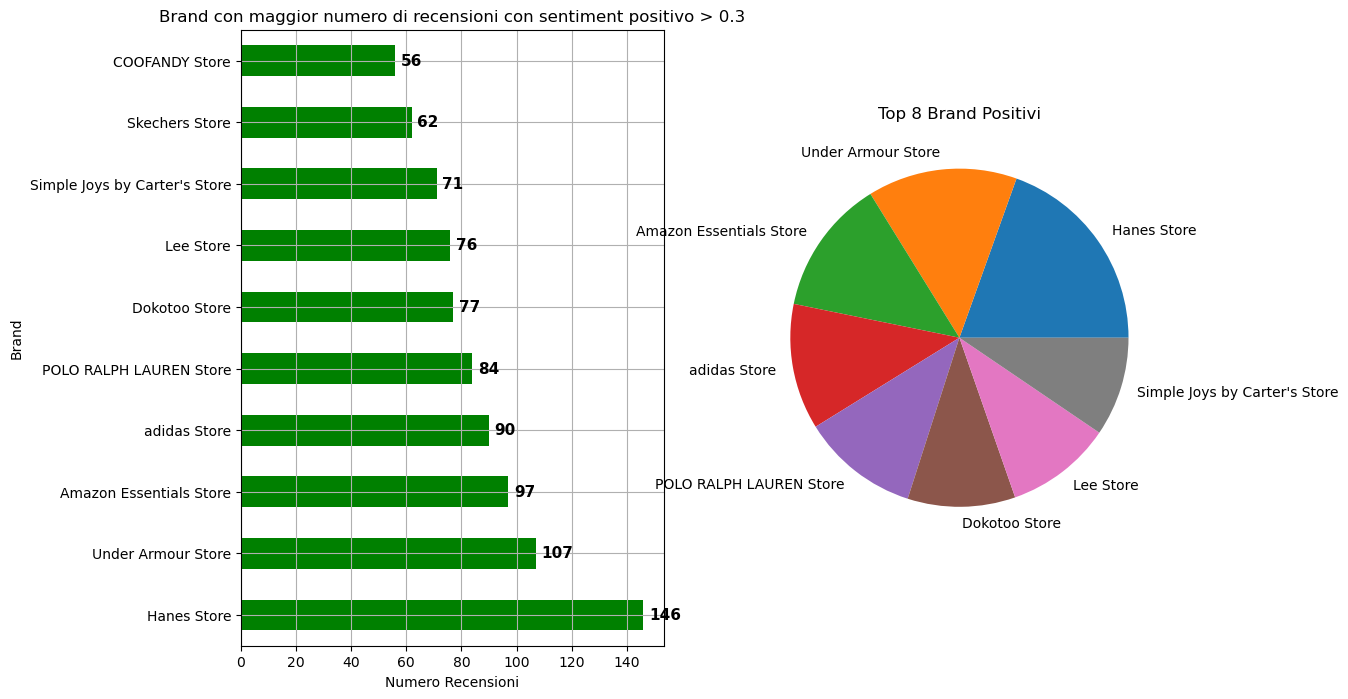

In [78]:
brand_positive = (dfamazoncopy[dfamazoncopy['sentiment_score']>0.3]
                  .groupby('brand_name')
                  .size()
                  .sort_values(ascending=False)
                  .head(10)
)
#SUBPLOT 1 RIGA x 2 COLONNE
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
#Grafico 1
brand_positive.plot(
    ax=ax1,
    kind='barh',
    color='green',
    grid=True
)
ax1.set_title('Brand con maggior numero di recensioni con sentiment positivo > 0.3')
ax1.set_ylabel('Brand')
ax1.set_xlabel('Numero Recensioni')
for i, v in enumerate(brand_positive.values):
    ax1.text(v + 2, i, f'{v:,}',
            va='center',
            fontweight='bold', 
            fontsize=11,
            )

#GRAFICO 2
brand_positive.head(8).plot(
    kind='pie',
    ax=ax2
)
ax2.set_title('Top 8 Brand Positivi')

plt.show()

### Brand più recensiti e con sentimento negativo (per cui brand dove NON conviene investire)

- Anna Rudych: Il grafico 2.1 sopra rappresenta sei principali brand presenti nel dataset che hanno ricevuto il maggior volume di recensioni con un punteggio di sentiment score negativo (definito come uno score inferiore a 0.0). La visualizzazione illustra i marchi che hanno generato la minore soddisfazione tra i clienti. 
Sull asse Y sono elencati i brand, sull asse X il numero delle recensioni negative per ciascuno. Il grafico 2.2 dimostra la distribuzione percentuale tra i top 8 brand con le recensioni negative. Il brand con più recensioni negative è "Hanes Store".  Ha il numero più elevato delle recensioni negative pari a 15. Il brand "COOFANDY Store" e "POLO RALF LAUREN Store" completano il tris dei "leader" con il punteggio 9 e 8. Il volume elevato delle recensioni negative è un forte indicatore di insoddisfazione o problemi tra i clieti. I marchi elencati hanno generato il maggior feedback negativo da parte dei clienti.

Text(0.5, 1.0, 'Top 8 Brand Negativi')

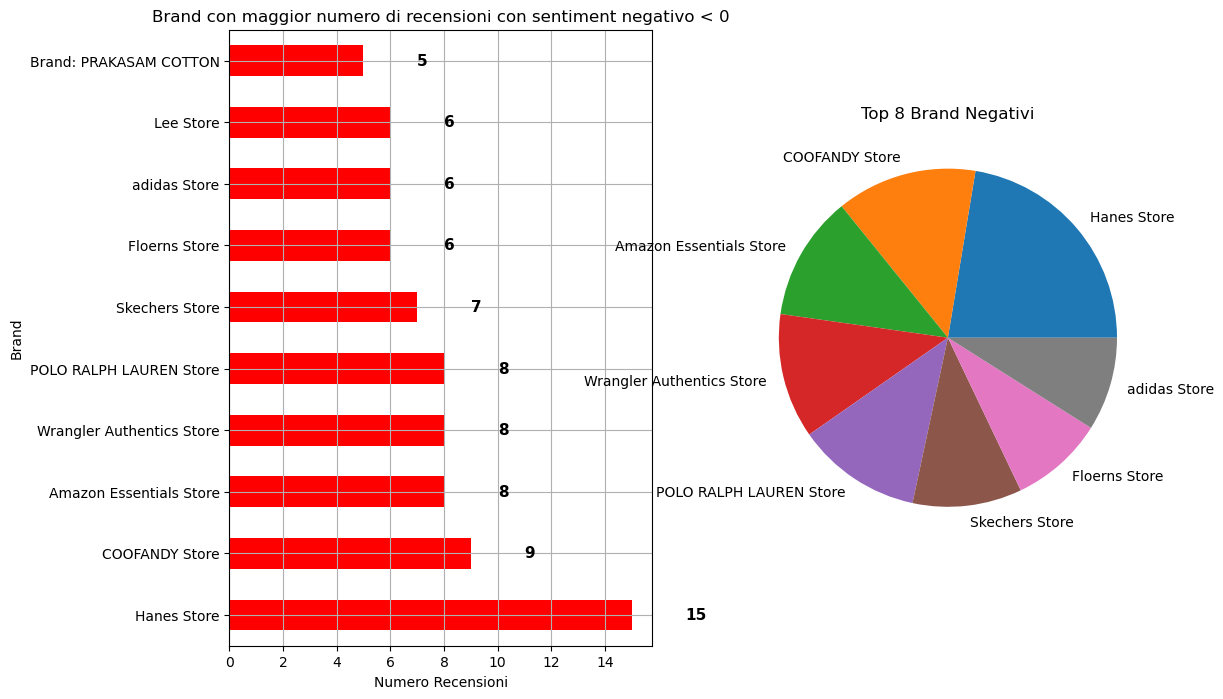

In [79]:
brand_positive = (dfamazoncopy[dfamazoncopy['sentiment_score']<0]
                  .groupby('brand_name')
                  .size()
                  .sort_values(ascending=False)
                  .head(10)
)
#SUBPLOT 1 RIGA x 2 COLONNE
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
#Grafico 1
brand_positive.plot(
    ax=ax1,
    kind='barh',
    color='red',
    grid=True
)
ax1.set_title('Brand con maggior numero di recensioni con sentiment negativo < 0')
ax1.set_ylabel('Brand')
ax1.set_xlabel('Numero Recensioni')
for i, v in enumerate(brand_positive.values):
    ax1.text(v + 2, i, f'{v:,}',
            va='center',
            fontweight='bold', 
            fontsize=11,
            )

#GRAFICO 2
brand_positive.head(8).plot(
    kind='pie',
    ax=ax2
)
ax2.set_title('Top 8 Brand Negativi')

In [80]:
brand_positive

brand_name
Hanes Store                  15
COOFANDY Store                9
Amazon Essentials Store       8
Wrangler Authentics Store     8
POLO RALPH LAUREN Store       8
Skechers Store                7
Floerns Store                 6
adidas Store                  6
Lee Store                     6
Brand: PRAKASAM COTTON        5
dtype: int64

- Anna Rudych: Un brand ideale per un investimento dovrebbe avere un alto volume di vendite e una solida base di recensioni positive, con minimi feedback negativi, indicando un prodotto affidabile e un mercato stabile.  Il brand "Hanes Stone" ha ricevuto più recensioni sia positive che negative. Questo può essere dovuto al suo leadership sul mercato e la quantità generale delle recensioni. Invece il brand "Under Armour Store" ha preso secondo posto nel TOP con il numero delle recensioni positive pari a 107 e nello stesso momento non è stato elencato tra i brand con il punteggio maggiore delle recensioni negative. Sulla base di questi insight, si raccomanda di investire nel brand "Under Armour Store". La sua capacità di generare un volume elevato di feedback positivi, combinata con un'assenza quasi totale di recensioni con score inferiore a 0, indica un marchio maturo, affidabile e con un'eccellente percezione della qualità.

### Categorie prodotti più venduti e totale degli incassi in base alla categoria

- Anna Rudych: La categoria più venduta è Clothing, Shoes & Jewelry (Vestiti, Scarpe, Gioielleria), sono 212857 unità totale vendute e 6276 recensioni ricevute. Questo indica una domanda di mercato molto elevata. I dati evidenziano un dominio schiacciante della categoria 'Clothing Man'. Pertanto, la raccomandazione di investimento si concentra sulla categoria 'Clothing Man' nel suo insieme, mirando ai brand specifici all'interno di essa che mantengono un sentiment positivo e volumi di vendita elevati

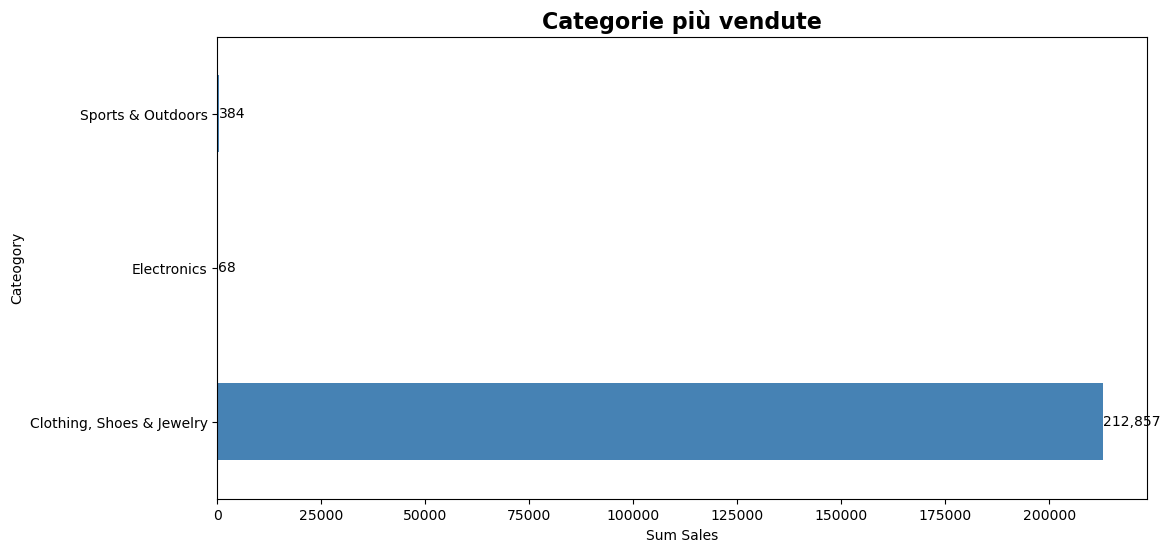

In [81]:
#CALCOLO RECENSIONI E INCASSI TOTALI PER CATEGORIA
cat1_sales=(dfamazoncopy[dfamazoncopy['category1'].notna() & (dfamazoncopy['category1'].str.strip()!='')]
            .groupby('category1')['price_value']
            .agg(['count','sum'])
            .reset_index()
            .rename(columns={
                'count':'n_review',
                'sum':'sum_sales'
            })
            )
ax1=(cat1_sales.set_index('category1')['sum_sales']
    .plot(
        kind='barh',
        color='steelblue',
        figsize=(12,6)
    ))
for i,v in enumerate(cat1_sales['sum_sales']):
    plt.text (v,i, f'{v:,.0f}', va='center', ha='left',fontsize='10')
    ax1.set_title('Categorie più vendute',fontsize=16,fontweight='bold')
    ax1.set_xlabel('Sum Sales')
    ax1.set_ylabel('Cateogory')
plt.show()


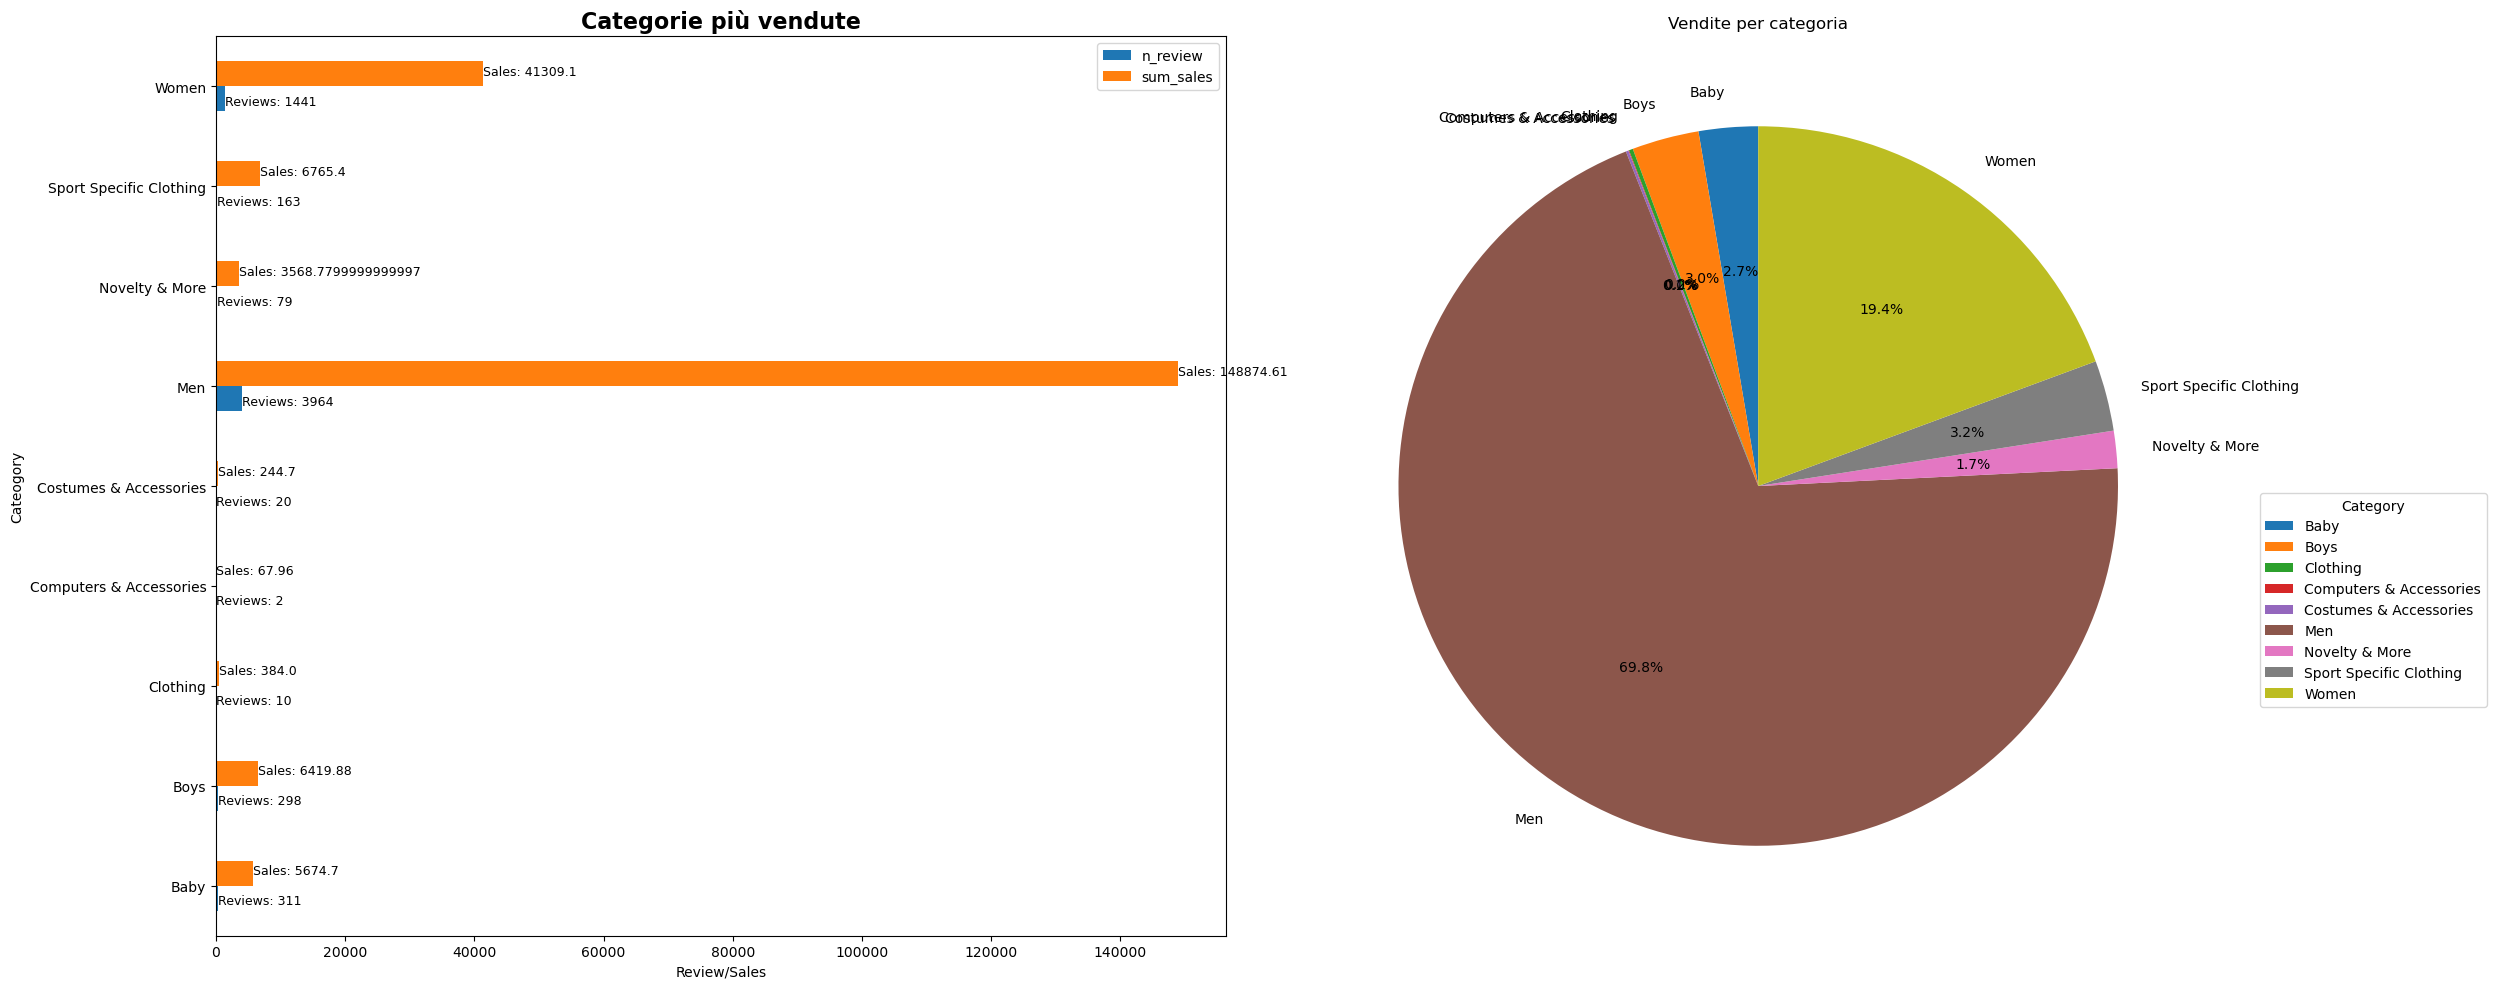

In [82]:
#CALCOLO RECENSIONI E INCASSI TOTALI PER CATEGORIA
cat2_sales=(dfamazoncopy[dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='')]
            .groupby('category2')['price_value']
            .agg(['count','sum'])
            .reset_index()
            .rename(columns={
                'count':'n_review',
                'sum':'sum_sales'
            })
            )
plot_cate=cat2_sales.set_index('category2')[['n_review','sum_sales']]
fig,(ax2,ax3)=plt.subplots(1,2,figsize=(25,8))
#---PRIMO SUBPLOT
ax2=plot_cate.plot(
    ax=ax2,
    kind='barh',
    figsize=(25,10)
)
for i, (val_review, val_sales) in enumerate(zip(plot_cate['n_review'],plot_cate['sum_sales'])):
    ax2.text(val_review, i-0.15, f'Reviews: {val_review}', va='center', ha='left',fontsize=9)
    ax2.text(val_sales, i+0.15, f'Sales: {val_sales}', va='center', ha='left',fontsize=9)
ax2.set_title('Categorie più vendute',fontsize=16,fontweight='bold')
ax2.set_xlabel('Review/Sales')
ax2.set_ylabel('Cateogory')
#---SECONDO SUBPLOT
plot_cate['sum_sales'].plot(
    ax=ax3,
    kind='pie',
    labels=plot_cate.index,
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''
)
#LEGGENDA
ax3.legend(
    plot_cate.index,
    title='Category',
    loc='best',
    bbox_to_anchor=(1.05,0.5) #OPZIONE PER SPOSTARE FUORI
)
ax3.set_title('Vendite per categoria')
plt.tight_layout() #per non sovrapporre grafici
plt.savefig('grafico.png', dpi=300, bbox_inches='tight')
plt.show()

### Categorie prodotti più recensiti e con sentimento positivo (per cui categorie su cui investire)


In [115]:
#COPIO DATAFRAME PER COLONNE CHE MI SERVONO
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']>0.3)
cat12_pose = dfamazoncopy.loc[mask,['category1','category2']].copy()
#contare recensioni
cat2_positive=(
    cat12_pose
    .groupby('category2')
    .size()
    .sort_values(ascending=False)
)
cat2_positive=cat2_positive.rename('n_positive').reset_index()
cat1_cat2_grouped = (cat12_pose
                    .groupby('category2')['category1']
                    .first()
                    .reset_index(name='category1')
)
#merge tabelle
tab_final=cat1_cat2_grouped.merge(cat2_positive,on='category2',how='right')
display(tab_final)


,category2,category1,n_positive
0,Men,"Clothing, Shoes & Jewelry",1935
1,Women,"Clothing, Shoes & Jewelry",693
2,Baby,"Clothing, Shoes & Jewelry",184
3,Boys,"Clothing, Shoes & Jewelry",174
4,Sport Specific Clothing,"Clothing, Shoes & Jewelry",75
5,Novelty & More,"Clothing, Shoes & Jewelry",47
6,Costumes & Accessories,"Clothing, Shoes & Jewelry",9
7,Clothing,Sports & Outdoors,3
8,Computers & Accessories,Electronics,2


### Categorie prodotti più recensiti e con sentimento negativo (per cui categorie su cui NON investire)

In [116]:
#COPIO DATAFRAME PER COLONNE CHE MI SERVONO
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']<0.0)
cat12_nega = dfamazoncopy.loc[mask,['category1','category2']].copy()
#contare recensioni
cat2_nega=(
    cat12_nega
    .groupby('category2')
    .size()
    .sort_values(ascending=False)
)
cat2_nega=cat2_nega.rename('n_nega').reset_index()
cat1_cat2_grouped_nega = (cat12_nega
                    .groupby('category2')['category1']
                    .first()
                    .reset_index(name='category1')
)
#merge tabelle
tab_final1=cat1_cat2_grouped_nega.merge(cat2_nega,on='category2',how='right')
display(tab_final1)


,category2,category1,n_nega
0,Men,"Clothing, Shoes & Jewelry",177
1,Women,"Clothing, Shoes & Jewelry",59
2,Baby,"Clothing, Shoes & Jewelry",13
3,Boys,"Clothing, Shoes & Jewelry",11
4,Novelty & More,"Clothing, Shoes & Jewelry",7
5,Sport Specific Clothing,"Clothing, Shoes & Jewelry",7
6,Costumes & Accessories,"Clothing, Shoes & Jewelry",2


,category2,category1,n_neutre,n_nega,n_positive,% positive,% neutre,% negative
0,Men,"Clothing, Shoes & Jewelry",1796,177.0,1935,49.51,45.96,4.53
1,Women,"Clothing, Shoes & Jewelry",681,59.0,693,48.36,47.52,4.12
2,Boys,"Clothing, Shoes & Jewelry",108,11.0,174,59.39,36.86,3.75
3,Baby,"Clothing, Shoes & Jewelry",105,13.0,184,60.93,34.77,4.30
4,Sport Specific Clothing,"Clothing, Shoes & Jewelry",79,7.0,75,46.58,49.07,4.35
5,Novelty & More,"Clothing, Shoes & Jewelry",24,7.0,47,60.26,30.77,8.97
6,Clothing,Sports & Outdoors,7,0.0,3,30.00,70.00,0.00
7,Costumes & Accessories,"Clothing, Shoes & Jewelry",7,2.0,9,50.00,38.89,11.11


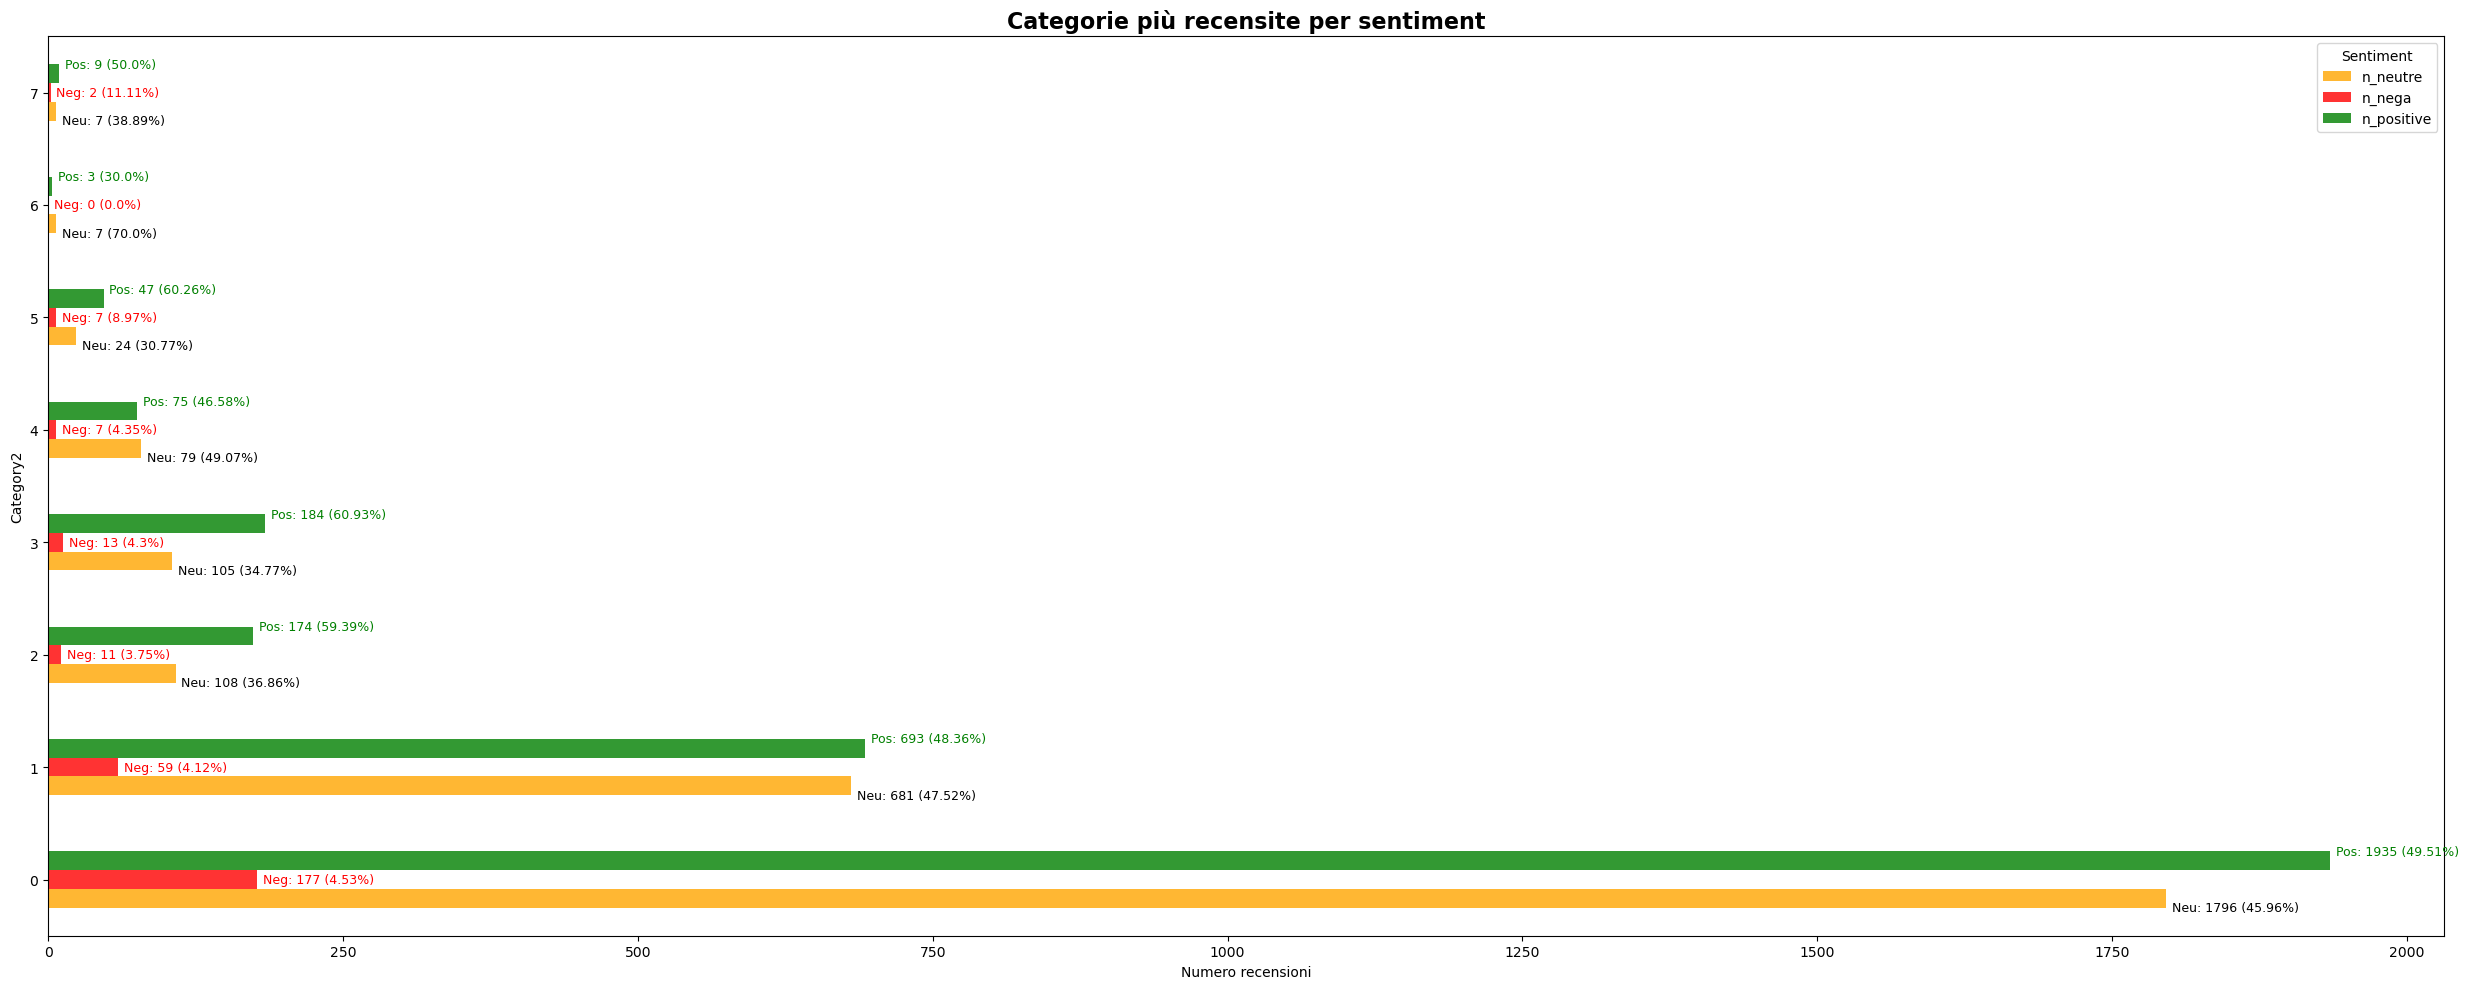

In [142]:
#COPIO DATAFRAME PER COLONNE CHE MI SERVONO
mask=dfamazoncopy['category2'].notna() & (dfamazoncopy['category2'].str.strip()!='') & (dfamazoncopy['sentiment_score']>=0.0) & (dfamazoncopy['sentiment_score']<0.3)
cat12_neutre = dfamazoncopy.loc[mask,['category1','category2']].copy()
#contare recensioni
cat2_neutre=(
    cat12_neutre
    .groupby('category2')
    .size()
    .sort_values(ascending=False)
)
cat2_neutre=cat2_neutre.rename('n_neutre').reset_index()
cat1_cat2_grouped = (cat12_neutre
                    .groupby('category2')['category1']
                    .first()
                    .reset_index(name='category1')
)
#merge tabelle
tab_final2=cat1_cat2_grouped.merge(cat2_neutre,on='category2',how='right')
tab_final2=tab_final2.merge(cat2_nega,on='category2',how='left')
tab_final2=tab_final2.merge(cat2_positive,on='category2',how='left')

# Riempio eventuali NaN con 0 per evitare errori nel calcolo
tab_final2[['n_positive', 'n_neutre', 'n_nega']] = tab_final2[['n_positive', 'n_neutre', 'n_nega']].fillna(0)

# Creo la nuova colonna calcolando la percentuale
tab_final2['% positive'] = (
    tab_final2['n_positive'] / (tab_final2['n_positive'] + tab_final2['n_neutre'] + tab_final2['n_nega']) * 100
).round(2)
tab_final2['% neutre'] = (
    tab_final2['n_neutre'] / (tab_final2['n_positive'] + tab_final2['n_neutre'] + tab_final2['n_nega']) * 100
).round(2)
tab_final2['% negative'] = (
    tab_final2['n_nega'] / (tab_final2['n_positive'] + tab_final2['n_neutre'] + tab_final2['n_nega']) * 100
).round(2)
display(tab_final2)

fig, ax2 = plt.subplots(figsize=(25, 10))

# solo le 3 colonne di conteggio nel barh
tab_final2[['n_neutre','n_nega','n_positive']].plot(
    kind='barh',
    ax=ax2,
    color=['orange', 'red', 'green'],
    alpha=0.8
)

# etichette con valore + percentuale
for i, (idx, row) in enumerate(tab_final2.iterrows()):
    vn, vneg, vpos = row['n_neutre'], row['n_nega'], row['n_positive']
    pn, pneg, ppos = row['% neutre'], row['% negative'], row['% positive']

    ax2.text(vn  + 5, i - 0.25, f'Neu: {int(vn)} ({pn}%)',   va='center', ha='left', fontsize=9)
    ax2.text(vneg+ 5, i,        f'Neg: {int(vneg)} ({pneg}%)', va='center', ha='left', fontsize=9, color='red')
    ax2.text(vpos+ 5, i + 0.25, f'Pos: {int(vpos)} ({ppos}%)', va='center', ha='left', fontsize=9, color='green')

ax2.set_title('Categorie più recensite per sentiment', fontsize=16, fontweight='bold')
ax2.set_xlabel('Numero recensioni')
ax2.set_ylabel('Category2')
ax2.legend(title='Sentiment', loc='upper right')

plt.tight_layout()
plt.savefig('grafico_categorie_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

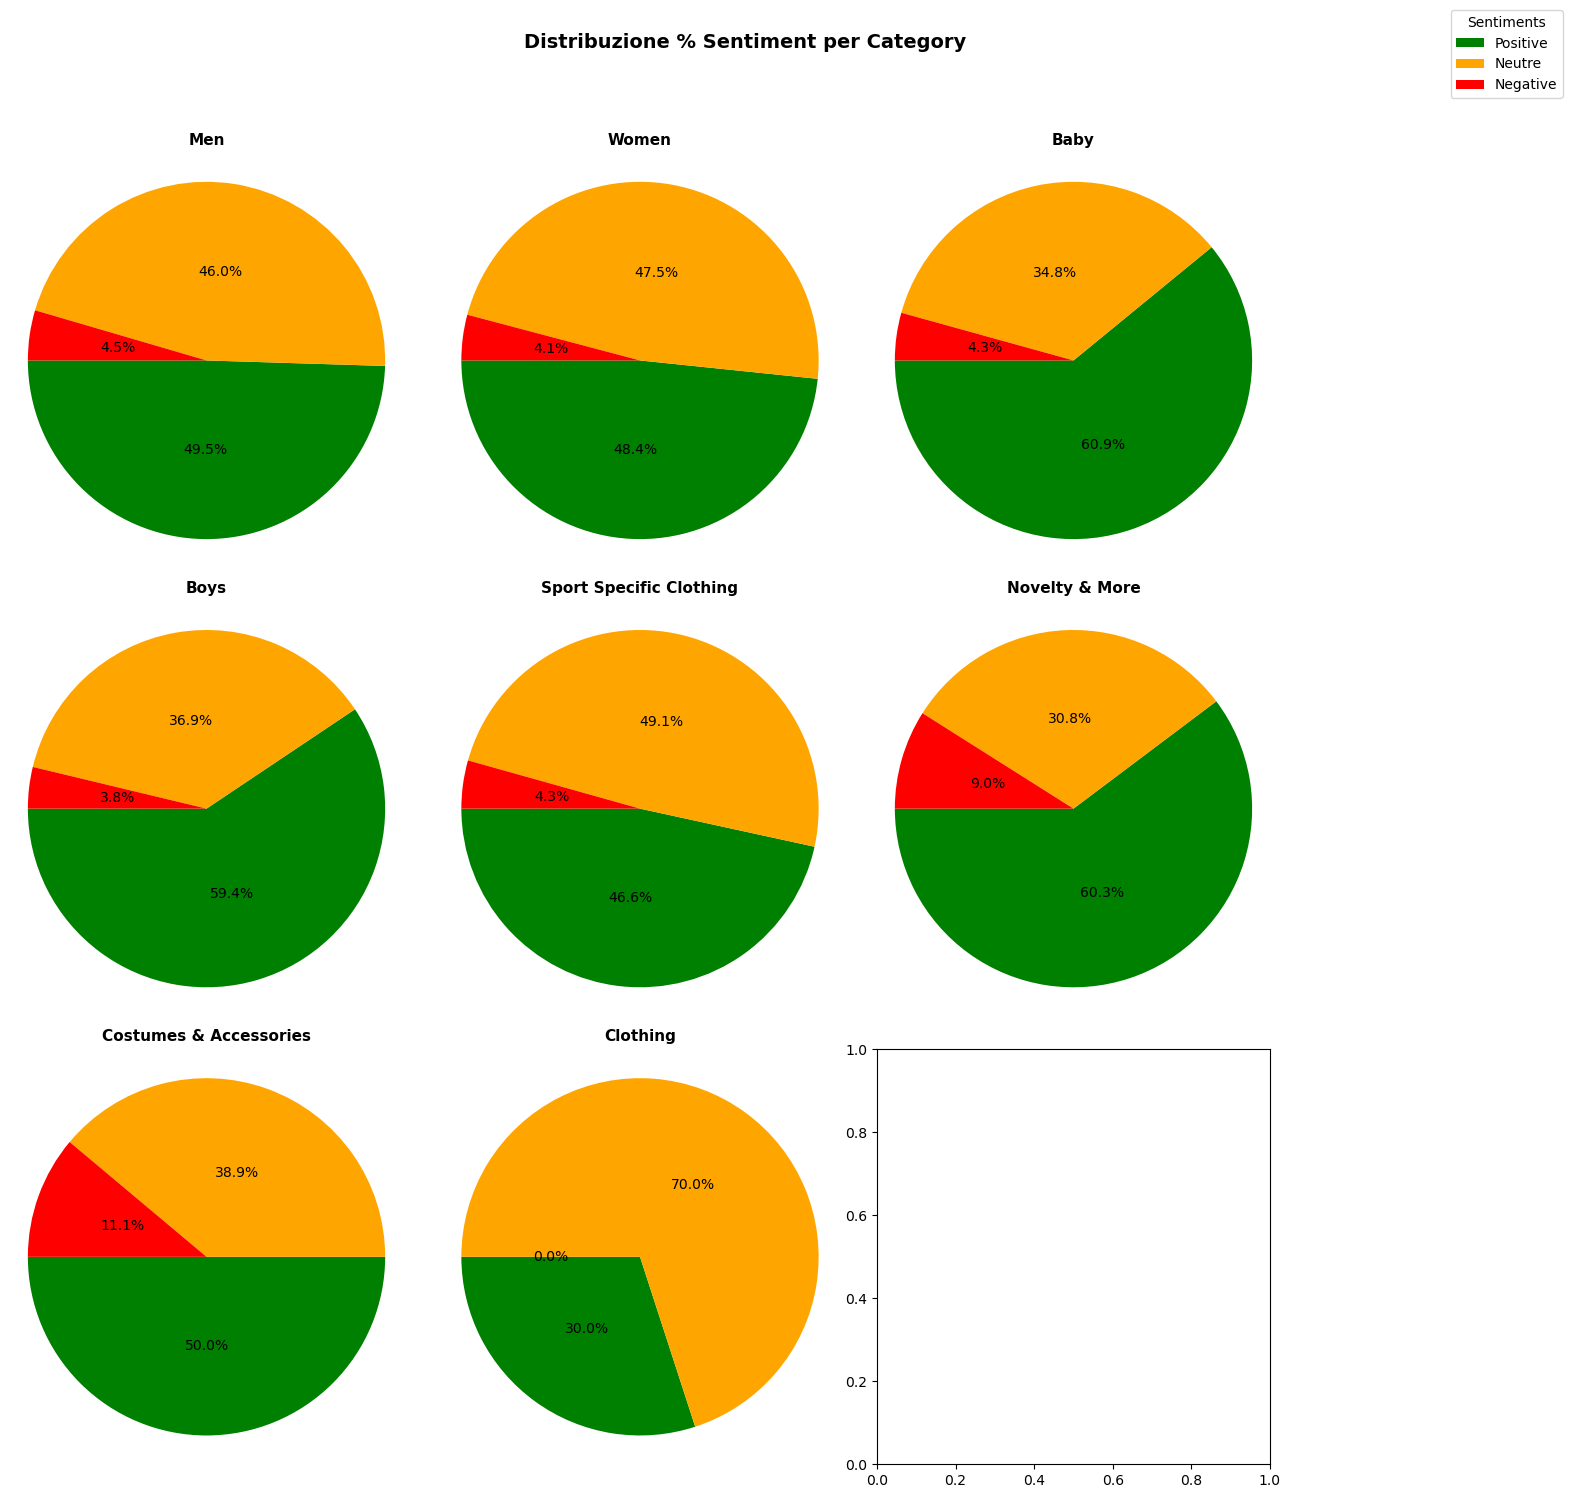

In [ ]:
tab_plot = tab_final2.copy()
tab_plot['tot']=tab_plot['n_positive']+tab_plot['n_neutre']+tab_plot['n_nega']
tab_plot = tab_plot.sort_values('tot',ascending=False).head(9)

n_cat=len(tab_plot)
n_cols = 3
nrows = math.ceil(n_cat/n_cols)

fig,axes=plt.subplots(nrows,n_cols, figsize=(5*n_cols,5*nrows))
#SE C'E' SOLO UNA RGA/COLONNA AXES E' 2D AL CONTRARIO FORZO AD 1D
axes = axes.flatten() if isinstance(axes, (list,np.ndarray)) else [axes] 
labels=['Positive', 'Neutre','Negative']
colors=['green','orange','red']
for i, (idx,row) in enumerate(tab_plot.iterrows()):
    ax=axes[i]
    sizes=[row['% positive'], row['% neutre'], row['% negative']]
  

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=None,
        colors=colors,
        autopct='%1.1f%%',
        startangle=180,
        pctdistance=0.5
    )
    ax.set_title(row['category2'], fontsize=11, fontweight='bold')
    ax.axis('equal') #fai per tutti un cerchio

#Legenda Unica
fig.legend(
    wedges,
    labels,
    loc='upper right',
    bbox_to_anchor=(1.05,1),
    title='Sentiments'
)
#Titolo Generale
plt.suptitle('Distribuzione % Sentiment per Category', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.90, right=0.85) # SPAZIO BIANCO VERSO TITOLO E LEGENDA
plt.show()